In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
net = pd.read_excel("Netflix-Dataset-Latest-2021.xlsx")
net

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Unnamed: 29,Unnamed: 30
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,NaN,NaN
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube,NaN,NaN
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube,NaN,NaN
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,Gary Winick,"Josh Goldsmith, Cathy Yuspa",...,https://www.netflix.com/watch/60034573,https://www.imdb.com/title/tt0337563,When a geeky teens birthday party goes awry an...,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1iJQ,YouTube,NaN,NaN
9421,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Jason Spingarn-Koff,NaN,...,https://www.netflix.com/watch/70129457,https://www.imdb.com/title/tt1518809,Computer users across the globe log onto the v...,878.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=2TY-O5Dc8oA,YouTube,NaN,NaN
9422,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,Amos Gitai,NaN,...,https://www.netflix.com/watch/70125340,NaN,In an idyllic port town on Australias west coa...,14.0,http://cdn1.nflximg.net/images/5543/12045543.jpg,NaN,https://www.youtube.com/watch?v=RnGRdaX594k,YouTube,NaN,NaN
9423,Daniel Are

In [5]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  9425 non-null   object        
 1   Genre                  9400 non-null   object        
 2   Tags                   9389 non-null   object        
 3   Languages              9266 non-null   object        
 4   Series or Movie        9425 non-null   object        
 5   Hidden Gem Score       9415 non-null   float64       
 6   Country Availability   9414 non-null   object        
 7   Runtime                9424 non-null   object        
 8   Director               7120 non-null   object        
 9   Writer                 7615 non-null   object        
 10  Actors                 9314 non-null   object        
 11  View Rating            6827 non-null   object        
 12  IMDb Score             9417 non-null   float64       
 13  Rot

In [4]:
# determinare quali film non hanno pubblicato il proprio trailer u youtube

net[net["Trailer Site"]!="YouTube"]["Title"]

564                                          The Wretched
610                                     The Devils Island
611                                     The Devils Ballad
776                                        The Rest Of Us
967                                   By the Grace of God
1078                                      Shine Your Eyes
1642                                               Mine 9
1723                                 The Valhalla Murders
1782                         Unabomber - In His Own Words
1963                                   Mrs. Lowry and Son
2166                                                Klaus
2648                                   Romeo Akbar Walter
2689                                Anarchist from Colony
2695                                    3 Seconds Divorce
3007                                           I Am Maris
3324                              Bill Hicks: Reflections
3512    My Little Pony Friendship Is Magic: Best Gift ...
4519          

In [14]:
# determinare quanti film e serie in base alla loro durata ci sono

net[["Series or Movie", "Runtime"]].groupby(["Series or Movie", "Runtime"]).size()

Series or Movie  Runtime     
Movie            1-2 hour        5230
                 30-60 mins       136
                 < 30 minutes      93
                 > 2 hrs         1551
Series           < 30 minutes    2414
dtype: int64

In [43]:
# creare un nuovo dataframe con queste colonne: Title, Director, IMDb Score, Awards Received

new = pd.DataFrame(net[["Title", "Director", "IMDb Score", "Awards Received"]])
new

,Title,Director,IMDb Score,Awards Received
0,Lets Fight Ghost,Tomas Alfredson,7.9,74.0
1,HOW TO BUILD A GIRL,Coky Giedroyc,5.8,1.0
2,The Con-Heartist,Mez Tharatorn,7.4,NaN
3,Gleboka woda,NaN,7.5,2.0
4,Only a Mother,Alf Sjöberg,6.7,2.0
...,...,...,...,...
9420,13 Going on 30,Gary Winick,6.2,NaN
9421,LIFE 2.0,Jason Spingarn-Koff,6.2,1.0
9422,Brand New Day,Amos Gitai,7.3,NaN
9423,Daniel Arends: Blessuretijd,Doesjka van Hoogdalem,7.8,NaN


In [44]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9425 non-null   object 
 1   Director         7120 non-null   object 
 2   IMDb Score       9417 non-null   float64
 3   Awards Received  5226 non-null   float64
dtypes: float64(2), object(2)
memory usage: 294.7+ KB


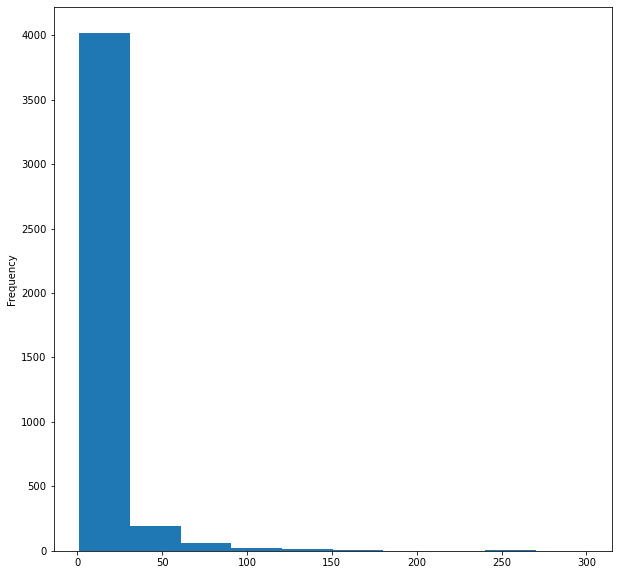

In [26]:
# Creare 2 istogrammi con queste x:

# x = Awards Received
# x = Director

fig, ax = plt.subplots(figsize=(10,10))
new["Awards Received"].plot.hist(ax=ax)
plt.show()

In [31]:
new["Director"].value_counts()

Steven Spielberg     28
Pedro Almodóvar      16
Clint Eastwood       15
George Lucas         14
Jay Roach            14
                     ..
Gregory Kirchhoff     1
Chris Butler          1
Eric D. Howell        1
Craig Leeson          1
Peter Landesman       1
Name: Director, Length: 2572, dtype: int64

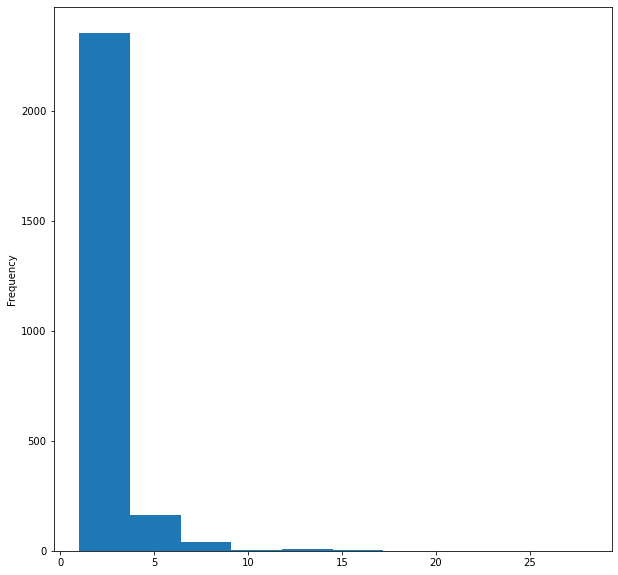

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
new["Director"].value_counts().plot.hist(ax=ax)
plt.show()

In [35]:
# trovare il regista più bravo (da determinare anche quale colonna tra IMDb Score e Awards Received è meglio usare)

registi = new["Director"].unique()
registi

array(['Tomas Alfredson', 'Coky Giedroyc', 'Alf Sjöberg', ...,
       'Mark Davis, Noel Clarke', 'Géla Babluani', 'Jason Spingarn-Koff'],
      dtype=object)

In [38]:
punteggi = {}
for regista in registi:
    punteggi[regista] = new[new["Director"] == regista]["IMDb Score"].sum()
    
    

In [39]:
punteggi

{'Tomas Alfredson': 30.800000000000004,
 'Coky Giedroyc': 5.8,
 'Alf Sjöberg': 6.7,
 'Hans Alfredson': 7.6,
 'José Esteban Alenda, César Esteban Alenda': 7.7,
 'Todd Phillips': 43.2,
 'George Lucas': 92.10000000000001,
 'David Yates': 59.099999999999994,
 'Peter Ho-Sun Chan': 29.299999999999997,
 'Francis Veber': 7.0,
 'Mikio Naruse': 23.5,
 'Miwa Nishikawa': 7.2,
 'Michel Ocelot': 7.0,
 'Bertrand Tavernier': 28.5,
 'Woody Allen': 89.29999999999998,
 'Ji-won Lee': 6.6,
 'Robert Redford': 22.6,
 'Yang Zhang': 7.5,
 'Eric Barbier': 7.2,
 'Andrey Zvyagintsev': 15.6,
 'Rob Reiner': 38.099999999999994,
 'Todd Haynes': 27.299999999999997,
 'Seung-Won Lee': 6.8,
 'Beom-sik Jeong': 6.3,
 'Byeong-heon Lee': 13.899999999999999,
 'Kook-Hee Choi': 6.6,
 'Joon-Hwan Jang': 22.1,
 'Tate Taylor': 26.6,
 'Masaaki Yuasa': 21.2,
 'Gregory Kirchhoff': 7.4,
 'Lydia Dean Pilcher': 6.3,
 'Robert Schwentke': 26.7,
 'Hsin-yao Huang': 7.4,
 'Maite Alberdi': 7.6,
 'Andrew Heckler': 6.6,
 'Alexander Nanau': 8.4,


In [47]:
r = new[["Director","IMDb Score"]].groupby("Director").sum()
r

,IMDb Score
Director,
A.R. Murugadoss,20.2
Aamir Bashir,6.4
"Aamir Khan, Amole Gupte",8.4
Aanand L. Rai,12.2
"Aaron Hann, Mario Miscione",6.0
...,...
Åsa Sandzén,6.9
"Çagan Irmak, Veysel Aslan",13.6
Éric Rohmer,15.4


In [52]:
r.values.max()

210.99999999999997

In [53]:
r[r["IMDb Score"]==210.99999999999997]

,IMDb Score
Director,
Steven Spielberg,211.0
